This data has been aggregated based on the supplier rental indicator because separate fee schedules apply for rental versus purchase of products. To protect the privacy of Medicare beneficiaries, any aggregated records which are derived from 10 or fewer claims are excluded from the Referring Provider DMEPOS PUF.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
df1=pd.read_csv("./datasets/Medicare_Referring_Provider_DMEPOS_PUF_CY2017.csv")

/Users/umangimistry/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [57]:
df1.head()

,Referring NPI,Referring Provider Last/Organization Name,Referring Provider First Name\t,Referring Provider Middle Initial,Referring Credentials,Referring Provider Gender,Referring Entity Code,Referring Provider Street 1,Referring Provider Street 2,Referring Provider City,...,BETOS Classification Group,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Number of Supplier Services,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount\t,Average Supplier Medicare Standard Amount
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,Durable Medical Equipment,Y,5,14.0,99,99,50.561818,19.030000,14.438889,13.105152
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,Durable Medical Equipment,Y,6,18.0,115,115,355.367652,76.947478,55.718087,51.084000
2,1003000407,GIRARDI,DAVID,J,D.O.,M,I,100 HOSPITAL RD,NaN,BROOKVILLE,...,Durable Medical Equipment,Y,2,NaN,12,12,28.000000,4.972500,3.900000,3.597500
3,1003000480,ROTHCHILD,KEVIN,B,MD,M,I,12605 E 16TH AVE,NaN,AURORA,...,Durable Medical Equipment,Y,5,NaN,12,12,760.480000,75.624167,59.286667,55.340000
4,1003000522,WEIGAND,FREDERICK,J,MD,M,I,1565 SAXON BLVD,SUITE 102,DELTONA,...,Durable Medical Equipment,N,13,26.0,49,92,55.535000,8.320000,6.096522,6.096522


Check all columns

In [58]:
df1.shape

(1644505, 28)

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644505 entries, 0 to 1644504
Data columns (total 28 columns):
 #   Column                                     Non-Null Count    Dtype  
---  ------                                     --------------    -----  
 0   Referring NPI                              1644505 non-null  int64  
 1   Referring Provider Last/Organization Name  1644488 non-null  object 
 2   Referring Provider First Name	             1644439 non-null  object 
 3   Referring Provider Middle Initial          1234811 non-null  object 
 4   Referring Credentials                      1602102 non-null  object 
 5   Referring Provider Gender                  1644456 non-null  object 
 6   Referring Entity Code                      1644505 non-null  object 
 7   Referring Provider Street 1                1644505 non-null  object 
 8   Referring Provider Street 2                657957 non-null   object 
 9   Referring Provider City                    1644505 non-null  object 

In [60]:
df1.columns

Index(['Referring NPI', 'Referring Provider Last/Organization Name',
       'Referring Provider First Name\t', 'Referring Provider Middle Initial',
       'Referring Credentials', 'Referring Provider Gender',
       'Referring Entity Code', 'Referring Provider Street 1',
       'Referring Provider Street 2', 'Referring Provider City',
       'Referring Provider State', 'Referring Provider Zip',
       'Referring Provider Country', 'Referring Provider Type',
       'Referring Provider Type Flag', 'HCPCS Code', 'HCPCS Description',
       'BETOS Classification', 'BETOS Classification Group',
       'Supplier Rental Indicator', 'Number of Suppliers',
       'Number of Supplier Beneficiaries', 'Number of Supplier Claims',
       'Number of Supplier Services', 'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount\t',
       'Average Supplier Medicare Standard Amount'],
      dtype='object')

You can see some columns have "Refferring" at the starting of the column name. To make it easy let's rempve that

In [61]:
# removing 'Referring' from column name
df1.columns = df1.columns.str.lstrip("Referring")

In [62]:
# check column names
df1.columns 

Index([' NPI', ' Provider Last/Organization Name', ' Provider First Name\t',
       ' Provider Middle Initial', ' Credentials', ' Provider Gender',
       ' Entity Code', ' Provider Street 1', ' Provider Street 2',
       ' Provider City', ' Provider State', ' Provider Zip',
       ' Provider Country', ' Provider Type', ' Provider Type Flag',
       'HCPCS Code', 'HCPCS Description', 'BETOS Classification',
       'BETOS Classification Group', 'Supplier Rental Indicator',
       'Number of Suppliers', 'Number of Supplier Beneficiaries',
       'Number of Supplier Claims', 'Number of Supplier Services',
       'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount\t',
       'Average Supplier Medicare Standard Amount'],
      dtype='object')

After removing 'referring' ,it makes white space at the left.Let's remove that white space

In [63]:
df1.columns=df1.columns.str.strip()

In [64]:
df1.columns

Index(['NPI', 'Provider Last/Organization Name', 'Provider First Name',
       'Provider Middle Initial', 'Credentials', 'Provider Gender',
       'Entity Code', 'Provider Street 1', 'Provider Street 2',
       'Provider City', 'Provider State', 'Provider Zip', 'Provider Country',
       'Provider Type', 'Provider Type Flag', 'HCPCS Code',
       'HCPCS Description', 'BETOS Classification',
       'BETOS Classification Group', 'Supplier Rental Indicator',
       'Number of Suppliers', 'Number of Supplier Beneficiaries',
       'Number of Supplier Claims', 'Number of Supplier Services',
       'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount',
       'Average Supplier Medicare Standard Amount'],
      dtype='object')

Here we will only use some columns in further process and we will merge other datasets with this dataset.
So make similar column and to make it easy while merging I am renaming some columns

In [65]:
# renaming column names
df1 = df1.rename(columns={'Provider First Name': 'first_name','Provider City':"city",
                         'Provider Country':"country",})

In [66]:
# checking all changes that I have made
df1.head()

,NPI,Provider Last/Organization Name,first_name,Provider Middle Initial,Credentials,Provider Gender,Entity Code,Provider Street 1,Provider Street 2,city,...,BETOS Classification Group,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Number of Supplier Services,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,Durable Medical Equipment,Y,5,14.0,99,99,50.561818,19.030000,14.438889,13.105152
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,Durable Medical Equipment,Y,6,18.0,115,115,355.367652,76.947478,55.718087,51.084000
2,1003000407,GIRARDI,DAVID,J,D.O.,M,I,100 HOSPITAL RD,NaN,BROOKVILLE,...,Durable Medical Equipment,Y,2,NaN,12,12,28.000000,4.972500,3.900000,3.597500
3,1003000480,ROTHCHILD,KEVIN,B,MD,M,I,12605 E 16TH AVE,NaN,AURORA,...,Durable Medical Equipment,Y,5,NaN,12,12,760.480000,75.624167,59.286667,55.340000
4,1003000522,WEIGAND,FREDERICK,J,MD,M,I,1565 SAXON BLVD,SUITE 102,DELTONA,...,Durable Medical Equipment,N,13,26.0,49,92,55.535000,8.320000,6.096522,6.096522


Let's check null values in our dataset.

In [67]:
df1.isnull().sum()

NPI                                                0
Provider Last/Organization Name                   17
first_name                                        66
Provider Middle Initial                       409694
Credentials                                    42403
Provider Gender                                   49
Entity Code                                        0
Provider Street 1                                  0
Provider Street 2                             986548
city                                               0
Provider State                                     0
Provider Zip                                       0
country                                            0
Provider Type                                      0
Provider Type Flag                                 0
HCPCS Code                                         0
HCPCS Description                                  0
BETOS Classification                               0
BETOS Classification Group                    

In [68]:
# As this is real health care data I am avoiding imputation.
# all categorical columns which has name ,credentials,gender, street I am imputing unknown

In [69]:
df1=df1.fillna("Unknown")

After imputing 'Unknown',check null values again

In [70]:
df1.isnull().sum()

NPI                                          0
Provider Last/Organization Name              0
first_name                                   0
Provider Middle Initial                      0
Credentials                                  0
Provider Gender                              0
Entity Code                                  0
Provider Street 1                            0
Provider Street 2                            0
city                                         0
Provider State                               0
Provider Zip                                 0
country                                      0
Provider Type                                0
Provider Type Flag                           0
HCPCS Code                                   0
HCPCS Description                            0
BETOS Classification                         0
BETOS Classification Group                   0
Supplier Rental Indicator                    0
Number of Suppliers                          0
Number of Sup

Earlier I have imputed 'Unknown' for all null values,but there is one column which is numeric.
So I am changing it to 0.

In [71]:
df1["Number of Supplier Beneficiaries"]=df1["Number of Supplier Beneficiaries"].replace("Unknown",0)

In [72]:
df1.columns

Index(['NPI', 'Provider Last/Organization Name', 'first_name',
       'Provider Middle Initial', 'Credentials', 'Provider Gender',
       'Entity Code', 'Provider Street 1', 'Provider Street 2', 'city',
       'Provider State', 'Provider Zip', 'country', 'Provider Type',
       'Provider Type Flag', 'HCPCS Code', 'HCPCS Description',
       'BETOS Classification', 'BETOS Classification Group',
       'Supplier Rental Indicator', 'Number of Suppliers',
       'Number of Supplier Beneficiaries', 'Number of Supplier Claims',
       'Number of Supplier Services', 'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount',
       'Average Supplier Medicare Standard Amount'],
      dtype='object')

Just checking and understanding my dataset

For providers that have more than one Medicare specialty code reported on their claims, the Medicare specialty code associated with the largest number of services was used

In [73]:
# provider type is basically medicare specialty
df1["Provider Type"].unique()

array(['Internal Medicine', 'Family Practice', 'General Surgery',
       'Urology', 'Anesthesiology',
       'Physical Medicine and Rehabilitation', 'Orthopedic Surgery',
       'Endocrinology', 'Rheumatology', 'Nephrology', 'Pulmonary Disease',
       'Nurse Practitioner', 'Physician Assistant', 'Geriatric Medicine',
       'Gastroenterology', 'Critical Care (Intensivists)', 'Cardiology',
       'Podiatry', 'Dermatology', 'Ophthalmology', 'Optometry',
       'Neurosurgery', 'Medical Oncology', 'Neurology', 'Pain Management',
       'Interventional Cardiology', 'Pediatric Medicine',
       'Sports Medicine', 'Hand Surgery', 'Hospitalist',
       'Hematology-Oncology', 'Otolaryngology',
       'Osteopathic Manipulative Medicine', 'Emergency Medicine',
       'Hospice and Palliative Care', 'Vascular Surgery',
       'General Practice', 'Radiation Oncology',
       'Undefined Physician type', 'Clinical Cardiac Electrophysiology',
       'Psychiatry', 'Cardiac Surgery', 'Allergy/ Immunolog

In [74]:
# indicates the source of the Referring Provider Type
df1["Provider Type Flag"].value_counts()

S    1635287
T       9218
Name: Provider Type Flag, dtype: int64

"S" = Medicare Specialty Code description 

"T" = Taxonomy Code Classification description

In [75]:
df1["HCPCS Code"].nunique()
# HCPCS code for the specific product or service furnished by the DMEPOS supplier

1070

In [76]:
df1["HCPCS Code"].value_counts()

A4253    137364
E1390    121927
A4259     89377
E0431     78237
E0570     62183
          ...  
E2227         1
A6217         1
L6890         1
J2930         1
E2388         1
Name: HCPCS Code, Length: 1070, dtype: int64

In [77]:
df1.columns

Index(['NPI', 'Provider Last/Organization Name', 'first_name',
       'Provider Middle Initial', 'Credentials', 'Provider Gender',
       'Entity Code', 'Provider Street 1', 'Provider Street 2', 'city',
       'Provider State', 'Provider Zip', 'country', 'Provider Type',
       'Provider Type Flag', 'HCPCS Code', 'HCPCS Description',
       'BETOS Classification', 'BETOS Classification Group',
       'Supplier Rental Indicator', 'Number of Suppliers',
       'Number of Supplier Beneficiaries', 'Number of Supplier Claims',
       'Number of Supplier Services', 'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount',
       'Average Supplier Medicare Standard Amount'],
      dtype='object')

In [78]:
df1["HCPCS Description"]
# Description of the HCPCS code for the specific product or service furnished by the DMEPOS supplier.

0          Portable gaseous oxygen system, rental; includ...
1          Oxygen concentrator, single delivery port, cap...
2                                 Nebulizer, with compressor
3          Oxygen concentrator, single delivery port, cap...
4          Blood glucose test or reagent strips for home ...
                                 ...                        
1644500    Continuous positive airway pressure (cpap) device
1644501    Oxygen concentrator, single delivery port, cap...
1644502                           Nebulizer, with compressor
1644503    Portable gaseous oxygen system, rental; includ...
1644504    Oxygen concentrator, single delivery port, cap...
Name: HCPCS Description, Length: 1644505, dtype: object

In [79]:
df1["HCPCS Description"].nunique()

1062

In [80]:
df1["BETOS Classification"].unique()
# Berenson-Eggers Type of Service (BETOS) classification code assigned to the HCPCS code.
# The BETOS coding system consists of readily understood clinical categories that permit objective assignment of HCPCS codes.

array(['D1C - Oxygen and Supplies', 'D1E - Other DME',
       'D1D - Wheelchairs', 'D1F - Prosthetic/Orthotic devices',
       'D1B - Hospital Beds', 'D1G - Drugs Administered Through DME',
       'O1E - Other Drugs', 'D1A - Medical/Surgical Supplies',
       'O1C - Enteral and Parenteral', 'O1D - Chemotherapy',
       'O1G - Immunizations/Vaccinations', 'ZZZ - All Other'],
      dtype=object)

In [81]:
df1["BETOS Classification Group"].value_counts()
#  High level grouping of the BETOS classifications into three groups including Durable Medical Equipment (BETOS codes: D1A, D1B, D1C, D1D, D1E, D1G),
# Prosthetic and Orthotic Devices (D1F), and Drugs and Nutritional Products (O1C, O1D, O1E, O1G and all other unclassified codes).


Durable Medical Equipment          1306096
Prosthetic and Orthotic Devices     175907
Drugs and Nutritional Products      162502
Name: BETOS Classification Group, dtype: int64

In [82]:
df1["Number of Supplier Beneficiaries"]

0          14.0
1          18.0
2           0.0
3           0.0
4          26.0
           ... 
1644500     0.0
1644501     0.0
1644502     0.0
1644503     0.0
1644504     0.0
Name: Number of Supplier Beneficiaries, Length: 1644505, dtype: float64

In [83]:
df1["Number of Supplier Claims"]
# Number of DMEPOS claims submitted by the supplier, reflecting products/services ordered by the referring provider.
# Aggregated records based on number_of_supplier_claims fewer than 11 are not included in the data file

0           99
1          115
2           12
3           12
4           49
          ... 
1644500     23
1644501     12
1644502     41
1644503     14
1644504     17
Name: Number of Supplier Claims, Length: 1644505, dtype: int64

In [84]:
df1["Number of Supplier Services"]

0           99
1          115
2           12
3           12
4           92
          ... 
1644500     23
1644501     12
1644502     42
1644503     23
1644504     17
Name: Number of Supplier Services, Length: 1644505, dtype: int64

In [85]:
df1.head()

,NPI,Provider Last/Organization Name,first_name,Provider Middle Initial,Credentials,Provider Gender,Entity Code,Provider Street 1,Provider Street 2,city,...,BETOS Classification Group,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Number of Supplier Services,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount
0,1003000126,ENKESHAFI,ARDALAN,Unknown,M.D.,M,I,900 SETON DR,Unknown,CUMBERLAND,...,Durable Medical Equipment,Y,5,14.0,99,99,50.561818,19.030000,14.438889,13.105152
1,1003000126,ENKESHAFI,ARDALAN,Unknown,M.D.,M,I,900 SETON DR,Unknown,CUMBERLAND,...,Durable Medical Equipment,Y,6,18.0,115,115,355.367652,76.947478,55.718087,51.084000
2,1003000407,GIRARDI,DAVID,J,D.O.,M,I,100 HOSPITAL RD,Unknown,BROOKVILLE,...,Durable Medical Equipment,Y,2,0.0,12,12,28.000000,4.972500,3.900000,3.597500
3,1003000480,ROTHCHILD,KEVIN,B,MD,M,I,12605 E 16TH AVE,Unknown,AURORA,...,Durable Medical Equipment,Y,5,0.0,12,12,760.480000,75.624167,59.286667,55.340000
4,1003000522,WEIGAND,FREDERICK,J,MD,M,I,1565 SAXON BLVD,SUITE 102,DELTONA,...,Durable Medical Equipment,N,13,26.0,49,92,55.535000,8.320000,6.096522,6.096522


In [86]:
#  Identifies whether the DMEPOS product/service submitted on the supplier's claim 
# is rental or non-rental. A value of ‘Y’ indicates rental. A value of ‘N’ indicates
# non-rental
df1["Supplier Rental Indicator"]=df1["Supplier Rental Indicator"].map({"Y":1,"N":0})

In [87]:
provider_city=df1.groupby('city')["NPI"].count().reset_index()

provider_city

,city,NPI
0,ABBEVILLE,345
1,ABERDEEN,1068
2,ABERNATHY,1
3,ABILENE,1339
4,ABINGDON,746
...,...,...
9395,ZION CROSSROADS,28
9396,ZIONSVILLE,132
9397,ZUMBROTA,8
9398,ZUNI,18


In [88]:
df1=df1[["NPI","HCPCS Code","first_name","Supplier Rental Indicator","Number of Suppliers","Number of Supplier Beneficiaries",
    "Number of Supplier Claims","Average Supplier Submitted Charge","Average Supplier Medicare Allow Amount",
    "Average Supplier Medicare Payment Amount","Average Supplier Medicare Standard Amount"]]

Let's check unique provider

In [89]:
df1["NPI"].nunique()

293803

Lets check the supplier of all providers

In [117]:
supplier=df1.groupby(["NPI"],as_index=False)["Supplier Rental Indicator","Number of Suppliers","Number of Supplier Beneficiaries",
    "Number of Supplier Claims","Average Supplier Submitted Charge","Average Supplier Medicare Allow Amount",
    "Average Supplier Medicare Payment Amount","Average Supplier Medicare Standard Amount"].sum()

<ipython-input-117-5fa6142c3b00>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  supplier=df1.groupby(["NPI"],as_index=False)["Supplier Rental Indicator","Number of Suppliers","Number of Supplier Beneficiaries",


In [118]:
supplier.head()

,NPI,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount
0,1003000126,2,11,32.0,214,405.929470,95.977478,70.156976,64.189152
1,1003000407,1,2,0.0,12,28.000000,4.972500,3.900000,3.597500
2,1003000480,1,5,0.0,12,760.480000,75.624167,59.286667,55.340000
3,1003000522,1,29,43.0,109,245.186143,92.320000,67.667474,62.203188
4,1003000530,1,18,13.0,57,321.070179,207.290000,141.572076,141.572076


Let's visualize our data

In [119]:
supplier.describe()

,NPI,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount
count,2.938030e+05,293803.000000,293803.000000,293803.000000,293803.000000,293803.000000,293803.000000,293803.000000,293803.000000
mean,1.499550e+09,1.940242,26.827180,60.759131,226.119778,840.938772,275.485481,208.943588,207.601596
std,2.880164e+08,2.436640,45.684691,250.607715,637.781048,1574.155521,693.506972,537.091468,533.284280
min,1.003000e+09,0.000000,1.000000,0.000000,11.000000,0.001429,0.001429,0.000000,0.000000
25%,1.245595e+09,0.000000,4.000000,0.000000,26.000000,88.551619,28.404382,20.519898,20.578023
50%,1.497917e+09,1.000000,10.000000,11.000000,68.000000,377.857143,97.587811,73.403179,69.146667
75%,1.750304e+09,3.000000,30.000000,40.000000,187.000000,898.869067,233.621690,172.230857,167.818240
max,1.993000e+09,31.000000,1178.000000,15047.000000,44398.000000,130070.810428,77763.240222,60913.919680,59659.583423


In [120]:
supplier["Supplier Rental Indicator"].describe()

count    293803.000000
mean          1.940242
std           2.436640
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          31.000000
Name: Supplier Rental Indicator, dtype: float64

In [121]:
supplier["Supplier Rental Indicator"].sort_values(ascending=False)

31599     31
46434     27
256237    27
130412    26
104075    26
          ..
244778     0
244776     0
79777      0
79778      0
91074      0
Name: Supplier Rental Indicator, Length: 293803, dtype: int64

In [122]:
supplier["Number of Suppliers"].value_counts()

2      27523
1      25957
4      17143
3      16634
6      12884
       ...  
564        1
459        1
714        1
566        1
629        1
Name: Number of Suppliers, Length: 598, dtype: int64

Let's check number of supplier per provider

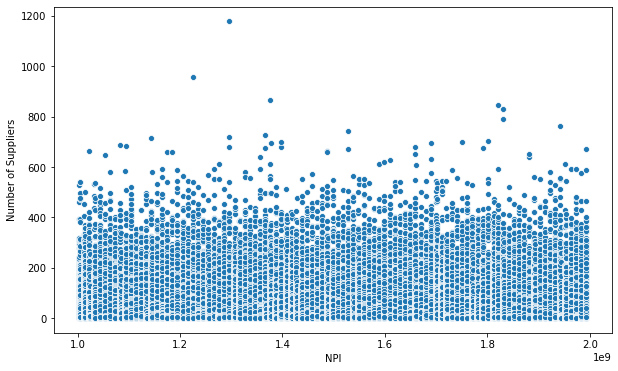

In [123]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=supplier["NPI"], 
                y=supplier["Number of Suppliers"])

From graph we can conclude that most of the provider has supplier under 500.There is some outliers too.
Let's find that.

Let's check the provider which has lowest suppliers

In [124]:
b=supplier[supplier["Number of Suppliers"] < 100]
b

,NPI,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount
0,1003000126,2,11,32.0,214,405.929470,95.977478,70.156976,64.189152
1,1003000407,1,2,0.0,12,28.000000,4.972500,3.900000,3.597500
2,1003000480,1,5,0.0,12,760.480000,75.624167,59.286667,55.340000
3,1003000522,1,29,43.0,109,245.186143,92.320000,67.667474,62.203188
4,1003000530,1,18,13.0,57,321.070179,207.290000,141.572076,141.572076
...,...,...,...,...,...,...,...,...,...
293797,1992997647,3,25,13.0,134,815.777068,186.771935,136.680719,133.279903
293798,1992998645,4,40,11.0,195,788.486078,208.440869,147.029627,146.017574
293800,1992999551,3,12,0.0,75,737.268205,126.905652,96.511293,96.860424
293801,1992999759,1,3,0.0,41,28.281905,4.739286,3.401429,3.241429


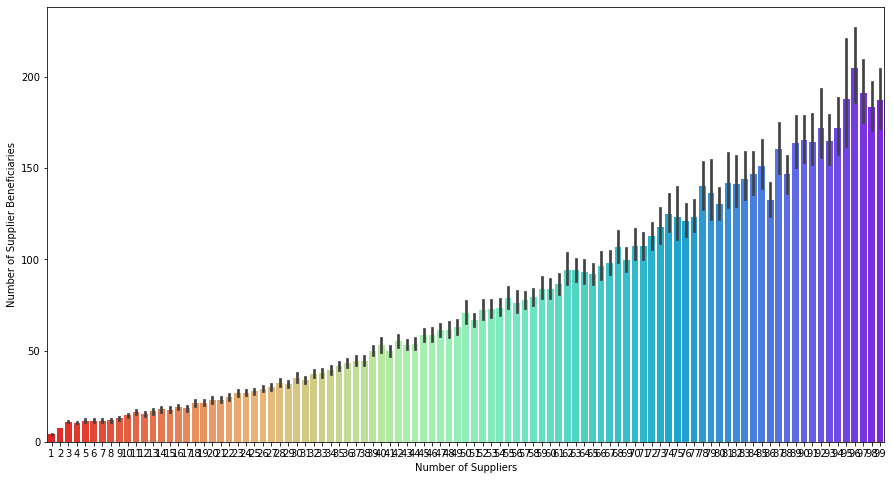

In [125]:
plt.figure(figsize=(15, 8))
sns.barplot(x=b["Number of Suppliers"], 
                y=b["Number of Supplier Beneficiaries"]
            , palette="rainbow_r");

From graph you can see that if the number of supplier is increases the benificiaries are increases too.

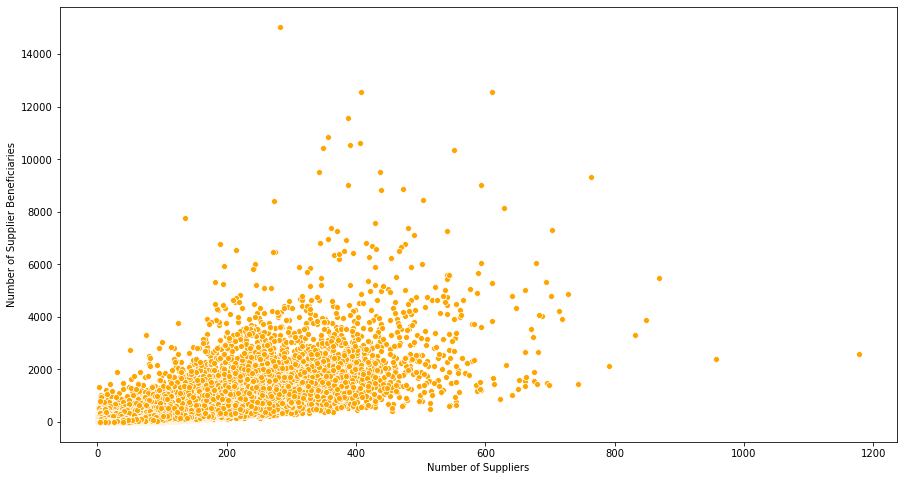

In [126]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=supplier["Number of Suppliers"], 
                y=supplier["Number of Supplier Beneficiaries"]
            ,color="orange");

Here we can observe that there are some outliers

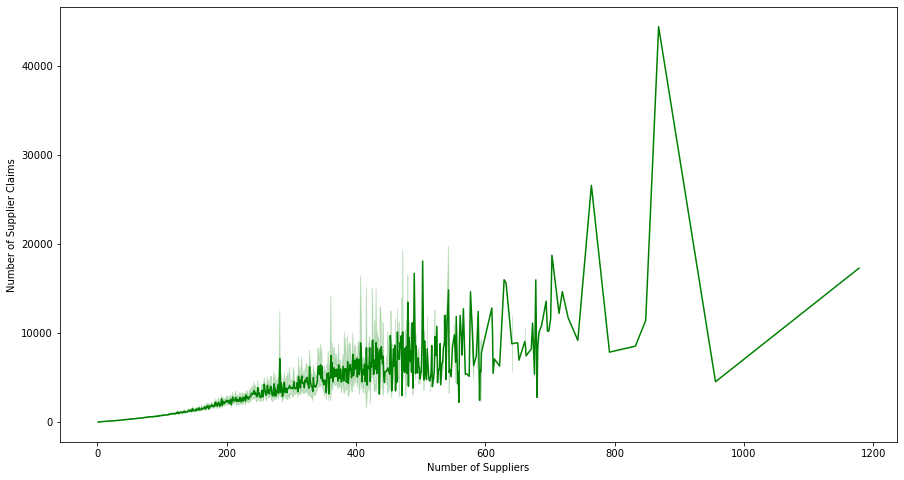

In [127]:
plt.figure(figsize=(15, 8))
sns.lineplot(y=supplier["Number of Supplier Claims"], 
                x=supplier["Number of Suppliers"]
            ,color="green");

You can see the supplier is increasing and the claims related to that supplier is also increases.

In [130]:
supplier.to_csv("./datasets/supplier_data.csv")

In [131]:
da=pd.read_csv("./datasets/fraud.csv",index_col=0)

In [132]:
da

,NPI,is_fraud
3,1922348218,1
23,1942476080,1
27,1275600959,1
30,1891731758,1
58,1851631543,1
...,...,...
73661,1124024435,1
73668,1194930149,1
73678,1578637385,1
73683,1558366815,1


In [133]:
df=supplier[['NPI','Supplier Rental Indicator', 'Number of Suppliers',
       'Number of Supplier Beneficiaries', 'Number of Supplier Claims',
       'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount',
       'Average Supplier Medicare Standard Amount']]

In [134]:
df

,NPI,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount
0,1003000126,2,11,32.0,214,405.929470,95.977478,70.156976,64.189152
1,1003000407,1,2,0.0,12,28.000000,4.972500,3.900000,3.597500
2,1003000480,1,5,0.0,12,760.480000,75.624167,59.286667,55.340000
3,1003000522,1,29,43.0,109,245.186143,92.320000,67.667474,62.203188
4,1003000530,1,18,13.0,57,321.070179,207.290000,141.572076,141.572076
...,...,...,...,...,...,...,...,...,...
293798,1992998645,4,40,11.0,195,788.486078,208.440869,147.029627,146.017574
293799,1992999122,5,102,228.0,803,1499.742931,414.684936,307.830830,282.686290
293800,1992999551,3,12,0.0,75,737.268205,126.905652,96.511293,96.860424
293801,1992999759,1,3,0.0,41,28.281905,4.739286,3.401429,3.241429


In [135]:
df=df.groupby("NPI")['Supplier Rental Indicator', 'Number of Suppliers',
       'Number of Supplier Beneficiaries', 'Number of Supplier Claims',
       'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount',
       'Average Supplier Medicare Standard Amount'].sum()

<ipython-input-135-6e79cde80ac3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df=df.groupby("NPI")['Supplier Rental Indicator', 'Number of Suppliers',


In [136]:
df=df.reset_index()

In [137]:
df.to_csv("./datasets/supplier1_data.csv")

In [138]:
df

,NPI,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount
0,1003000126,2,11,32.0,214,405.929470,95.977478,70.156976,64.189152
1,1003000407,1,2,0.0,12,28.000000,4.972500,3.900000,3.597500
2,1003000480,1,5,0.0,12,760.480000,75.624167,59.286667,55.340000
3,1003000522,1,29,43.0,109,245.186143,92.320000,67.667474,62.203188
4,1003000530,1,18,13.0,57,321.070179,207.290000,141.572076,141.572076
...,...,...,...,...,...,...,...,...,...
293798,1992998645,4,40,11.0,195,788.486078,208.440869,147.029627,146.017574
293799,1992999122,5,102,228.0,803,1499.742931,414.684936,307.830830,282.686290
293800,1992999551,3,12,0.0,75,737.268205,126.905652,96.511293,96.860424
293801,1992999759,1,3,0.0,41,28.281905,4.739286,3.401429,3.241429


Let's check frauds in this data

In [139]:
fraud=pd.read_csv("./datasets/fraud.csv",index_col=0)

In [140]:
fraud

,NPI,is_fraud
3,1922348218,1
23,1942476080,1
27,1275600959,1
30,1891731758,1
58,1851631543,1
...,...,...
73661,1124024435,1
73668,1194930149,1
73678,1578637385,1
73683,1558366815,1


In [141]:
fraud_provider=df.merge(fraud,on="NPI")
fraud_provider

,NPI,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount,is_fraud
0,1003000407,1,2,0.0,12,28.000000,4.972500,3.900000,3.597500,1
1,1003127655,9,66,40.0,521,753.857921,388.559379,303.362041,299.128562,1
2,1003850603,0,6,0.0,14,47.963824,8.320000,4.796471,4.796471,1
3,1003892746,2,8,0.0,73,1353.370280,112.371172,84.367841,79.574446,1
4,1013009729,0,15,11.0,39,86.305686,9.740000,6.993412,6.993412,1
...,...,...,...,...,...,...,...,...,...,...
157,1982607370,15,187,353.0,1694,2190.454791,1124.673030,875.553880,820.175297,1
158,1982609723,1,1,0.0,12,230.000000,77.180000,55.467500,50.728333,1
159,1982706941,0,7,25.0,25,64.616331,9.740000,7.636897,7.636897,1
160,1992777296,6,587,4913.0,11932,3275.747961,990.908578,724.678599,670.760190,1


In this dataset,there is total 162 fraud providers.